
Model Accuracy: 80.45%


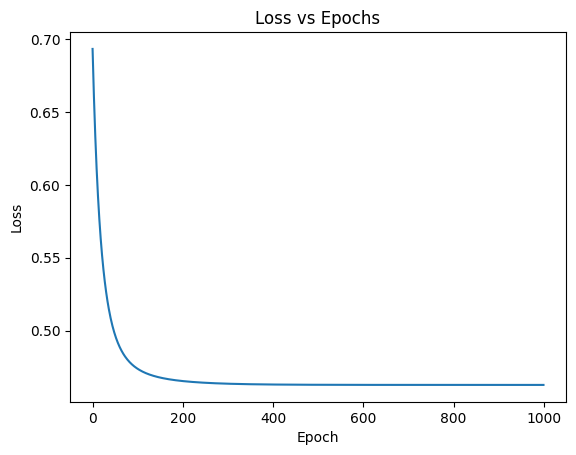

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\OneDrive\Desktop\First Semester\MrM Research\Coding\Data\titanic.csv")
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]]
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
X = df[["Pclass", "Sex", "Age", "Fare"]].values
y = df["Survived"].values.reshape(-1, 1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

class LogisticRegression:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.losses = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        for i in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            cost = -(1/m) * np.sum(y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9))
            self.losses.append(cost)
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)

model = LogisticRegression(lr=0.1, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"\nModel Accuracy: {accuracy:.2f}%")

plt.plot(model.losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()